In [ ]:
import json 
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display

# Playing around with some directory code
current_dir = os.getcwd()
path_bru = os.path.join("data", "daily_production")
json_path = os.path.join(path_bru, "BRU")
contents = os.listdir(path_bru)
basename = os.path.basename(path_bru)
dirname = os.path.dirname(path_bru)

# Define the relative path to the daily_production data folder

path_bru = os.path.join("data", "daily_production", "BRU")
path_sto = os.path.join("data", "daily_production", "STO")

# Playing around with some JSON code
def read_json_files(folder_path):
    # Create an empty DataFrame with specific columns
    df_dict = {
    'DoW': [],
    'hour': [],
    'minute': [],
    'date': [],
    'maintenance': [],
    'prod_loss': [],
    'prod_loss_perc': [],
    'production': []
    }
    df = pd.DataFrame(df_dict)

    # Iterate over each file in the folder
    for filename in os.listdir(folder_path):
        if filename.endswith('.json'):
            file_path = os.path.join(folder_path, filename)
            
            # Read the JSON file
            with open(file_path, 'r') as file:
                data = json.load(file)

                # Convert the dictionary to a list of dictionaries
                data_list = [data]
                
                # Convert the list of dictionaries to a dataframe
                temp_df = pd.DataFrame(data_list)
                
                # Append the temp_df to the DataFrame
                df = pd.concat([df, temp_df], ignore_index=True)
    
    return df

# Read JSON files and populate the DataFrame
df_bru = read_json_files(path_bru)
df_sto = read_json_files(path_sto)
display(df_bru)
display(df_sto)



## Let's make the concact operation faster

In [ ]:
import json 
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

# Define the relative path to the daily_production data folder
loc_bru = os.path.join("data", "daily_production", "BRU")
loc_sto = os.path.join("data", "daily_production", "STO")

# Define a function that reads the JSON files and populates the DataFrame
def read_json_files(loc):
    data_list = list()
    
    # Iterate over each file in the folder
    for filename in os.listdir(loc):
        if filename.endswith('.json'):
            file_path = os.path.join(loc, filename)
            
            # Read the JSON file
            with open(file_path, 'r') as file:
                data = json.load(file)
                
            # Append the data to data_list
            data_list.append(data)
    
    # Convert the list of dictionaries to a dataframe
    df = pd.DataFrame(data_list)
    
    return df

# Read JSON files and populate the DataFrame
df_bru = read_json_files(loc_bru)
df_sto = read_json_files(loc_sto)
display(df_bru)
display(df_sto)


## Define useful functions and variable mapping

In [ ]:
def convert_date(date_str): 
    return pd.to_datetime(date_str, format='%m-%d-%Y %H:%M:%S.%f')

def clean_data(dataframe):

    dataframe['date'] = convert_date(dataframe['date'])
    dataframe['hour'] = pd.to_datetime(dataframe['hour'].astype(str), format='%H').dt.hour
    dataframe['minute'] = pd.to_datetime(dataframe['minute'].astype(str), format='%M').dt.minute

    dataframe['prod_loss_perc'] = dataframe['prod_loss_perc'].replace('#MV', np.nan).astype(float)
    dataframe['prod_loss'] = dataframe['prod_loss'].replace('#MV', np.nan).astype(float)
    dataframe['production'] = dataframe['production'].replace('#MV', np.nan).astype(float)
    
    return dataframe

df_bru = cleanData(df_bru)
df_sto = cleanData(df_sto)
display(df_bru)
display(df_sto)


## Write the restults to excel (currently optional)

In [ ]:
import pandas as pd

# Define the folder path to save the excel files
folder_path = os.path.join("data")

# Write the df_stu DataFrame to an excel file
df_bru.to_excel(os.path.join(folder_path, 'df_bru.xlsx'), index=False)

# Write the df_sto DataFrame to an excel file
df_sto.to_excel(os.path.join(folder_path, 'df_sto.xlsx'), index=False)

In [ ]:
# Function to plot histograms
def plot_histograms(df):
    # Dow vs production_loss
    plt.figure(figsize=(12, 4))
    plt.subplot(131)
    plt.hist(df['DoW'], weights=df['prod_loss'])
    plt.title('Dow vs production_loss')
    plt.xlabel('Day of Week')
    plt.ylabel('Production Loss')

    # Dow vs production
    plt.subplot(132)
    plt.hist(df['DoW'], weights=df['production'])
    plt.title('Dow vs production')
    plt.xlabel('Day of Week')
    plt.ylabel('Production')

    # Dow vs production_loss_percentage
    plt.subplot(133)
    plt.hist(df['DoW'], weights=df['prod_loss_perc'])
    plt.title('Dow vs production_loss_percentage')
    plt.xlabel('Day of Week')
    plt.ylabel('Production Loss Percentage')

    plt.tight_layout()
    plt.show()

# Call the function to plot histograms
plot_histograms(df_bru)
plot_histograms(df_sto)

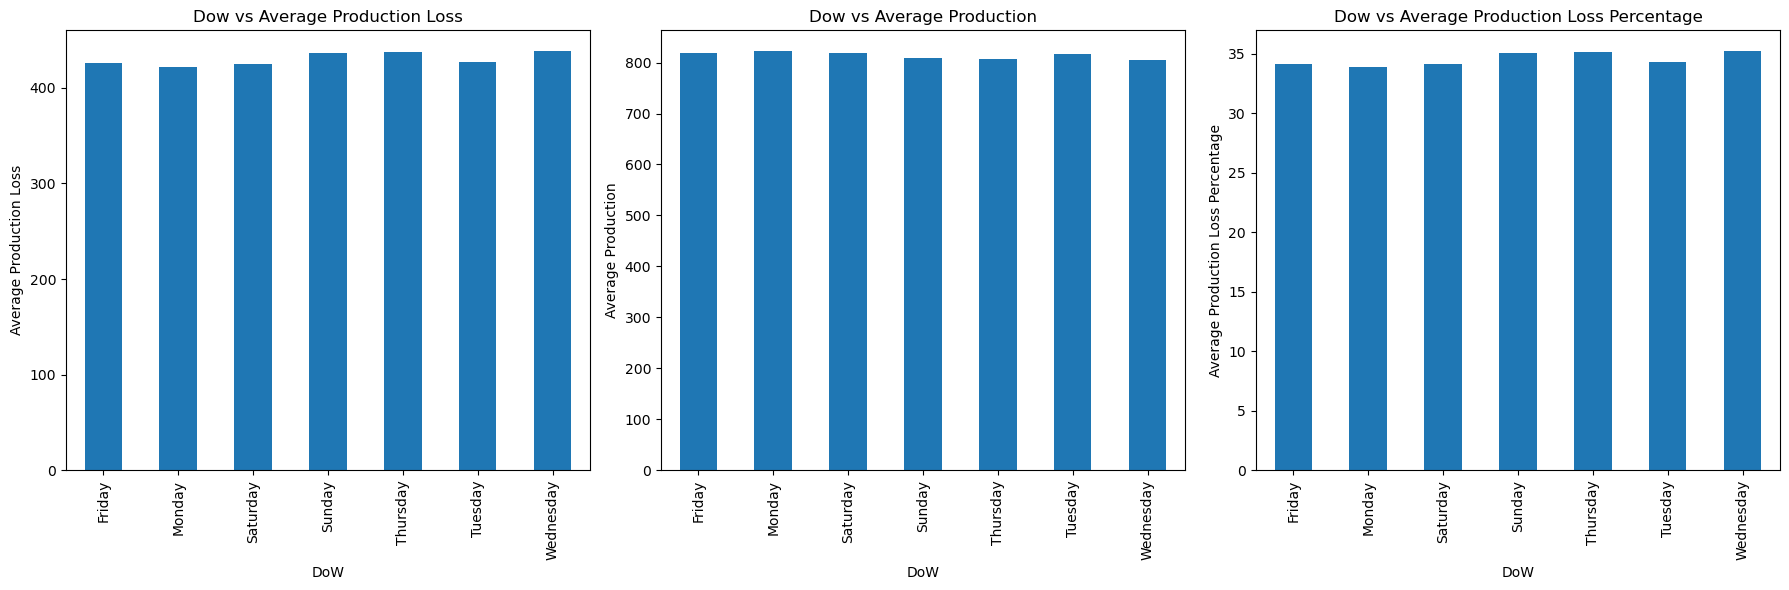

In [95]:
import matplotlib.pyplot as plt

# Function to plot bar charts for categorical data
def plot_bar_charts(df):
    # Prepare the figure with 3 subplots
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    # Dow vs production_loss
    df.groupby('DoW')['prod_loss'].mean().plot(kind='bar', ax=axes[0], title='Dow vs Average Production Loss')
    axes[0].set_ylabel('Average Production Loss')
    
    # Dow vs production
    df.groupby('DoW')['production'].mean().plot(kind='bar', ax=axes[1], title='Dow vs Average Production')
    axes[1].set_ylabel('Average Production')
    
    # Dow vs production_loss_percentage
    df.groupby('DoW')['prod_loss_perc'].mean().plot(kind='bar', ax=axes[2], title='Dow vs Average Production Loss Percentage')
    axes[2].set_ylabel('Average Production Loss Percentage')

    plt.tight_layout()
    plt.show()

# Call the function to plot bar charts
plot_bar_charts(df_bru)  # Assuming df_bru is the DataFrame you want to plot


In [ ]:
def find_best_fit_distribution_continuous(data, distributions=None):
    """
    Find the best-fit distribution for the given data.

    Parameters:
        data (array-like): The data to fit the distributions to.
        distributions (list, optional): The candidate distributions to consider.
            Defaults to [stats.norm, stats.gamma, stats.expon, stats.uniform].

    Returns:
        best_distribution (scipy.stats.rv_continuous): The best-fit distribution.
        best_params (tuple): The parameters of the best-fit distribution.
    """
    if distributions is None:
        distributions = [
            stats.norm,      # Normal distribution
            stats.gamma,     # Gamma distribution
            stats.expon,     # Exponential distribution
            stats.uniform    # Uniform distribution
        ]

    best_distribution = None
    best_params = {}
    best_sse = np.inf

    for distribution in distributions:
        params = distribution.fit(data)
        sse = np.sum((distribution.pdf(data, *params) - data) ** 2)

        if sse < best_sse:
            best_distribution = distribution
            best_params = params
            best_sse = sse

    return best_distribution, best_params

def main():
    # Generate sample data
    np.random.seed(0)
    values = np.random.normal(loc=0, scale=1, size=1000)

    # Find the best-fit distribution
    best_distribution, best_params = find_best_fit_distribution_continuous(values)

    # Print the best-fit distribution and its parameters
    print(f"Best-fit distribution: {best_distribution.name}")
    print(f"Parameters: {best_params}")

if __name__ == '__main__':
    main()